In [1]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mglearn.plots

<module 'mglearn.plots' from '/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/mglearn/plots.py'>

In [3]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [4]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [5]:
param_grid = {
    "n_estimators": [10, 50, 100, 200], # number of trees
    "max_depth" : [5, 10, 20, None], # number of levels, None specifies letting tree grow out all the way
    "max_features":["sqrt", 9, None], # number of features model will try at each partition, to see which feature is best at seperating data
}

# Want to try combination of eveything in param_grid to find best model (run through 48 models)

gs = GridSearchCV(rf, param_grid = param_grid, n_jobs = -1, return_train_score = True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [6]:
# Carry out the search - Will take a bit of time
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [7]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': 20, 'max_features': 9, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [8]:
results = pd.DataFrame(gs.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.684886,0.760786,0.243841,0.083062,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.876905,0.873742,...,0.874187,0.001640,48,0.888250,0.882065,0.884366,0.886604,0.879341,0.884125,0.003173
1,19.248117,0.992346,0.541246,0.124128,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.883520,0.882945,...,0.881263,0.002526,44,0.892421,0.892277,0.890695,0.888402,0.889983,0.890755,0.001498
2,38.078679,2.380120,0.897071,0.143406,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880069,0.884671,...,0.880630,0.002748,47,0.891486,0.890551,0.889832,0.889768,0.889408,0.890209,0.000738
3,93.243326,16.731388,3.415770,0.485491,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880357,0.884095,...,0.880746,0.002419,45,0.890479,0.889544,0.890479,0.891278,0.889264,0.890209,0.000724
4,6.445984,3.029515,0.249612,0.127025,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883808,0.879781,...,0.880688,0.002913,46,0.892492,0.888465,0.891414,0.893004,0.891493,0.891374,0.001574
5,36.092743,2.911334,0.472270,0.246203,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883520,0.886684,...,0.884082,0.003902,38,0.893931,0.894937,0.894434,0.891637,0.893866,0.893761,0.001130
6,102.601108,3.798657,1.791002,0.241470,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.880357,0.885246,...,0.883507,0.003191,39,0.893355,0.896016,0.893068,0.893794,0.894873,0.894221,0.001087
7,190.296688,7.672304,1.668658,0.190638,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883233,0.886396,...,0.885693,0.002598,37,0.892924,0.896088,0.894866,0.895089,0.894010,0.894595,0.001066
8,10.633247,6.102047,0.160547,0.119859,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.880357,0.874029,...,0.881321,0.004355,43,0.889616,0.886955,0.891198,0.895952,0.893507,0.891446,0.003102
9,83.311659,17.834286,1.065014,0.293730,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.874029,0.882082,...,0.882012,0.004652,42,0.887602,0.895369,0.890695,0.896455,0.894370,0.892898,0.003281


Let's look at only the most relevant rows

In [9]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [ ]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

In [10]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

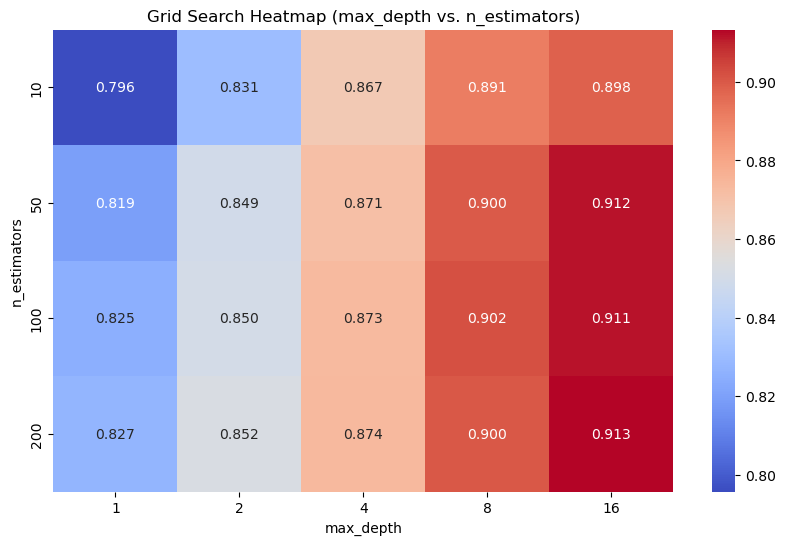

In [12]:
# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1,2,4,8,16],
    "n_estimators": [10,50,100,200],
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.